WORLD HAPPINESS REPORT

In [3]:
import pandas as pd

files = ["/Users/admin/StudioProjects/kizbasina-ds-bootcamp/world-happiness/2015.csv", "/Users/admin/StudioProjects/kizbasina-ds-bootcamp/world-happiness/2016.csv", "/Users/admin/StudioProjects/kizbasina-ds-bootcamp/world-happiness/2017.csv", "/Users/admin/StudioProjects/kizbasina-ds-bootcamp/world-happiness/2018.csv", "/Users/admin/StudioProjects/kizbasina-ds-bootcamp/world-happiness/2019.csv"]
dfs = []
for file in files:
    df = pd.read_csv(file)
    year = int(os.path.basename(file)[:4])
    df['Year'] = year
    dfs.append(df)

data = pd.concat(dfs, ignore_index=True)

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        470 non-null    object 
 1   Region                         315 non-null    object 
 2   Happiness Rank                 315 non-null    float64
 3   Happiness Score                315 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       315 non-null    float64
 6   Family                         470 non-null    float64
 7   Health (Life Expectancy)       315 non-null    float64
 8   Freedom                        470 non-null    float64
 9   Trust (Government Corruption)  315 non-null    float64
 10  Generosity                     782 non-null    float64
 11  Dystopia Residual              315 non-null    float64
 12  Year                           782 non-null    int

In [6]:
print(data.head())

       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe             1.0            7.587   
1      Iceland  Western Europe             2.0            7.561   
2      Denmark  Western Europe             3.0            7.527   
3       Norway  Western Europe             4.0            7.522   
4       Canada   North America             5.0            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  ...  \
0                   0.94143  0.66557                        0.41978  ...   
1                   0.94784  0.62877                        0.14145  ...   
2                   0.87464  0.6

In [34]:
data.columns

Index(['country', 'happiness_score', 'family', 'freedom', 'generosity',
       'year'],
      dtype='object')

In [7]:
data.isnull().sum()

Country                          312
Region                           467
Happiness Rank                   467
Happiness Score                  467
Standard Error                   624
Economy (GDP per Capita)         467
Family                           312
Health (Life Expectancy)         467
Freedom                          312
Trust (Government Corruption)    467
Generosity                         0
Dystopia Residual                467
Year                               0
Lower Confidence Interval        625
Upper Confidence Interval        625
Happiness.Rank                   627
Happiness.Score                  627
Whisker.high                     627
Whisker.low                      627
Economy..GDP.per.Capita.         627
Health..Life.Expectancy.         627
Trust..Government.Corruption.    627
Dystopia.Residual                627
Overall rank                     470
Country or region                470
Score                            470
GDP per capita                   470
S

In [8]:
# Öncelikle sütun isimlerini temizleyelim
data.columns = data.columns.str.strip().str.replace(' ', '_').str.replace('.', '').str.replace('(', '').str.replace(')', '').str.lower()

# Benzer sütunları birleştirme örneği (Happiness Score)
if 'happiness_score' in data.columns and 'happinessscore' in data.columns:
    data['happiness_score'] = data['happiness_score'].combine_first(data['happinessscore'])
    data.drop(columns=['happinessscore'], inplace=True)

# Çok fazla eksik verisi olan sütunları listele
missing_ratio = data.isnull().mean()
print(missing_ratio[missing_ratio > 0.5])  # %50'den fazla eksik olanlar

drop_cols = missing_ratio[missing_ratio > 0.5].index
data.drop(columns=drop_cols, inplace=True)

data.fillna(method='ffill', inplace=True)  # önceki satırdaki değeri doldur

# Kontrol edelim
print(data.isnull().sum())

region                          0.597187
happiness_rank                  0.597187
standard_error                  0.797954
economy_gdp_per_capita          0.597187
health_life_expectancy          0.597187
trust_government_corruption     0.597187
dystopia_residual               0.597187
lower_confidence_interval       0.799233
upper_confidence_interval       0.799233
happinessrank                   0.801790
whiskerhigh                     0.801790
whiskerlow                      0.801790
economygdppercapita             0.801790
healthlifeexpectancy            0.801790
trustgovernmentcorruption       0.801790
dystopiaresidual                0.801790
overall_rank                    0.601023
country_or_region               0.601023
score                           0.601023
gdp_per_capita                  0.601023
social_support                  0.601023
healthy_life_expectancy         0.601023
freedom_to_make_life_choices    0.601023
perceptions_of_corruption       0.602302
dtype: float64
c

/var/folders/j6/qz7jvdw95wx8s6pcwts1vqj00000gn/T/ipykernel_13244/491537534.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # önceki satırdaki değeri doldur


En mutlu 10 ülke 2015-2017 dönemi genelinde
Öncelikle verideki tüm yılları kullanarak en yüksek mutluluk puanına sahip ilk 10 ülkeyi bulalım.

In [38]:
# En mutlu 10 ülke
sns.barplot(y = df["Country"][:10], x = df["Happiness_Score"][:10])

KeyError: 'Country'

/var/folders/j6/qz7jvdw95wx8s6pcwts1vqj00000gn/T/ipykernel_13244/1003529379.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_scores.values, y=mean_scores.index, palette='viridis')


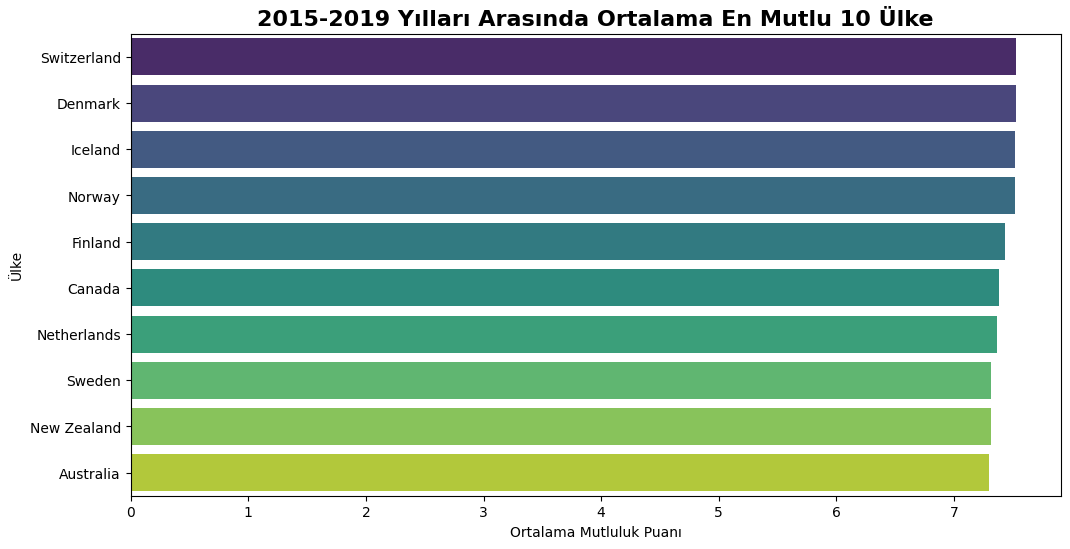

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Yıllara göre ortalama mutluluk puanı hesapla
mean_scores = data.groupby('country')['happiness_score'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=mean_scores.values, y=mean_scores.index, palette='viridis')
plt.title('2015-2019 Yılları Arasında Ortalama En Mutlu 10 Ülke', fontsize=16, weight='bold')
plt.xlabel('Ortalama Mutluluk Puanı')
plt.ylabel('Ülke')
plt.show()

In [11]:
print(data.columns)

Index(['country', 'happiness_score', 'family', 'freedom', 'generosity',
       'year'],
      dtype='object')


1. Hangi ülkeler veya bölgeler genel mutlulukta ve mutluluğa katkıda bulunan altı faktörün her birinde en yüksek sırada yer alıyor?

6 Faktör:
Ekonomi (GDP per capita)
Sosyal destek (Social support / Family)
Yaşam beklentisi (Healthy life expectancy)
Özgürlük (Freedom to make life choices)
Yolsuzluğun olmaması (Perceptions of corruption / Trust)
Cömertlik (Generosity)

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

columns_of_interest = [
    'country',
    'year',
    'happiness_score',
    'family',
    'freedom',
    'generosity'
]

df_selected = data[columns_of_interest].copy()
df_selected.dropna(inplace=True)

country_means = df_selected.groupby('country').mean()
country_means.sort_values(by='happiness_score', ascending=False).head(10)


,year,happiness_score,family,freedom,generosity
country,,,,,
Switzerland,2016.0,7.530000,1.337221,0.623737,0.289386
Denmark,2016.0,7.525000,1.358481,0.618266,0.352793
Iceland,2016.0,7.522000,1.398688,0.607391,0.462873
Norway,2016.0,7.519000,1.330458,0.633748,0.362651
Finland,2016.0,7.429333,1.331049,0.610227,0.244638
Canada,2016.0,7.382333,1.300020,0.605924,0.447330
Netherlands,2016.0,7.364667,1.246076,0.584418,0.473583
Sweden,2016.0,7.313000,1.284957,0.618301,0.376853
New Zealand,2016.0,7.311333,1.346882,0.611637,0.489675


/var/folders/j6/qz7jvdw95wx8s6pcwts1vqj00000gn/T/ipykernel_13244/3931250430.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x='country', y='happiness_score', palette='viridis')


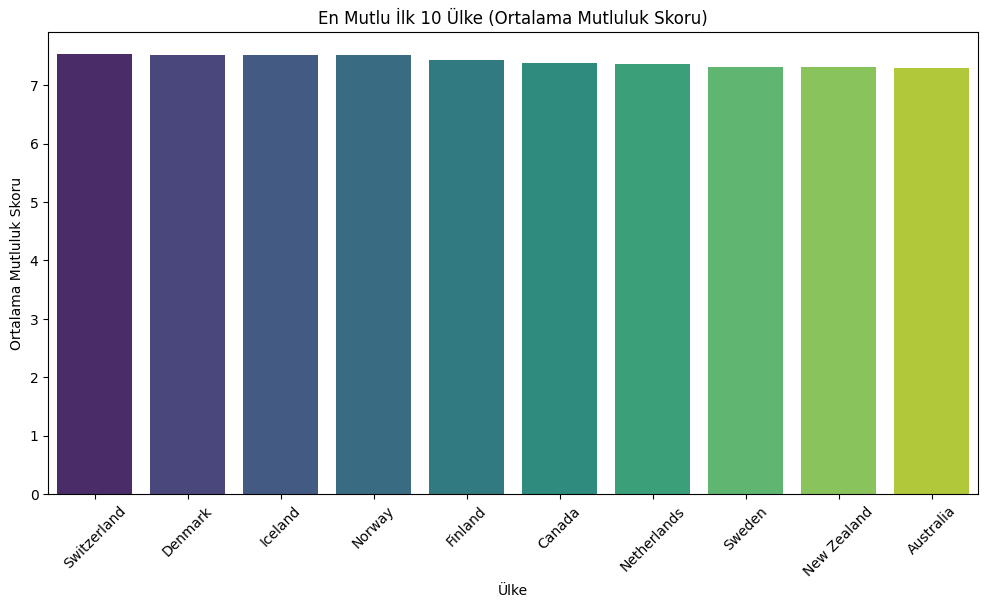

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(data=top_10, x='country', y='happiness_score', palette='viridis')
plt.title('En Mutlu İlk 10 Ülke (Ortalama Mutluluk Skoru)')
plt.ylabel('Ortalama Mutluluk Skoru')
plt.xlabel('Ülke')
plt.xticks(rotation=45)
plt.show()

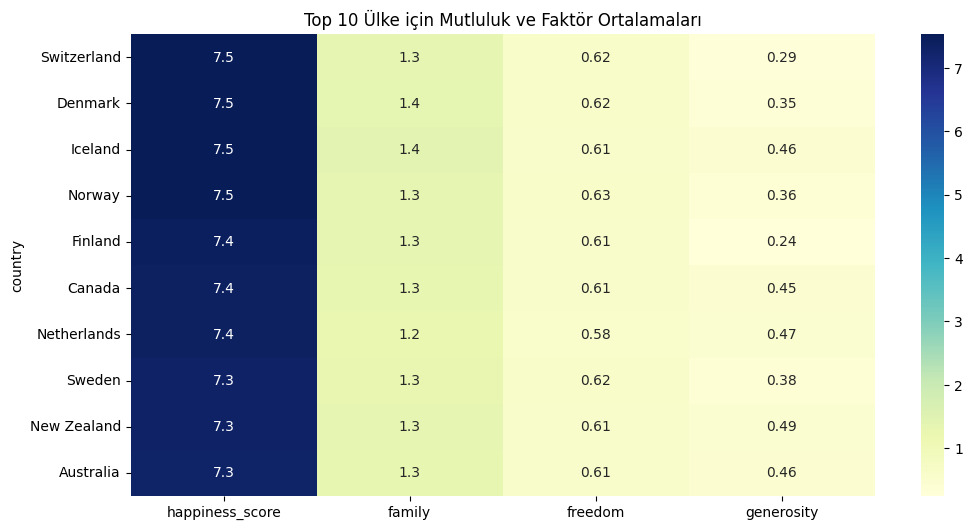

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10 = country_means.sort_values(by='happiness_score', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.heatmap(top_10[['happiness_score', 'family', 'freedom', 'generosity']], annot=True, cmap='YlGnBu')
plt.title('Top 10 Ülke için Mutluluk ve Faktör Ortalamaları')
plt.show()

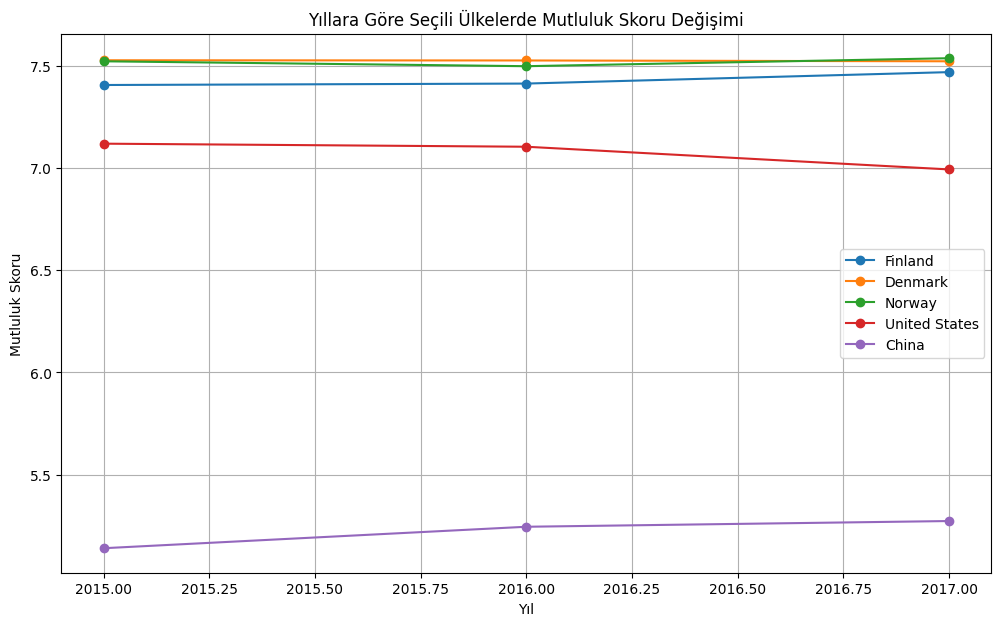

In [24]:
import matplotlib.pyplot as plt

# İncelemek istediğin ülkeleri seçelim
countries_to_plot = ['Finland', 'Denmark', 'Norway', 'United States', 'China']

plt.figure(figsize=(12,7))

for country in countries_to_plot:
    country_data = data[data['country'] == country].sort_values('year')
    plt.plot(country_data['year'], country_data['happiness_score'], marker='o', label=country)

plt.title('Yıllara Göre Seçili Ülkelerde Mutluluk Skoru Değişimi')
plt.xlabel('Yıl')
plt.ylabel('Mutluluk Skoru')
plt.legend()
plt.grid(True)
plt.show()

2015-2016 ile 2016-2017 raporları arasında ülke sıralamaları veya puanları nasıl değişti?

In [30]:
# Yıllara göre filtreleme
df_15_16 = data[(data['year'] == 2015) | (data['year'] == 2016)]
df_16_17 = data[(data['year'] == 2016) | (data['year'] == 2017)]

# Ortalama mutluluk skorlarını alalım (2015 ve 2016 için ayrı ayrı)
score_15 = df_15_16[df_15_16['year'] == 2015].groupby('country')['happiness_score'].mean()
score_16 = df_15_16[df_15_16['year'] == 2016].groupby('country')['happiness_score'].mean()

score_16_2 = df_16_17[df_16_17['year'] == 2016].groupby('country')['happiness_score'].mean()
score_17 = df_16_17[df_16_17['year'] == 2017].groupby('country')['happiness_score'].mean()

# Ortak ülkeleri bulalım
common_15_16 = score_15.index.intersection(score_16.index)
common_16_17 = score_16_2.index.intersection(score_17.index)

# Ortak ülkelerin sıralamalarını hesaplayalım
rank_15 = score_15[common_15_16].rank(ascending=False)
rank_16 = score_16[common_15_16].rank(ascending=False)

rank_16_b = score_16_2[common_16_17].rank(ascending=False)
rank_17 = score_17[common_16_17].rank(ascending=False)

# Sıralama değişimini hesaplayalım
rank_change_15_16 = rank_15 - rank_16
rank_change_16_17 = rank_16_b - rank_17

print("2015-2016 Rank Change:")
print(rank_change_15_16.sort_values())

print("\n2016-2017 Rank Change:")
print(rank_change_16_17.sort_values())

2015-2016 Rank Change:
country
Liberia     -33.0
Nigeria     -22.0
Venezuela   -21.0
Vietnam     -19.0
Zambia      -18.0
             ... 
Egypt        14.0
Romania      16.0
Cameroon     18.0
Latvia       22.0
Algeria      30.0
Name: happiness_score, Length: 151, dtype: float64

2016-2017 Rank Change:
country
Venezuela    -39.0
Somalia      -19.0
Algeria      -16.0
Kyrgyzstan   -15.0
Bhutan       -15.0
              ... 
Egypt         12.0
Latvia        12.0
Gabon         13.0
Hungary       14.0
Bulgaria      20.0
Name: happiness_score, Length: 150, dtype: float64


/var/folders/j6/qz7jvdw95wx8s6pcwts1vqj00000gn/T/ipykernel_13244/3297902891.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rank_change_top.values, y=rank_change_top.index, palette='coolwarm')


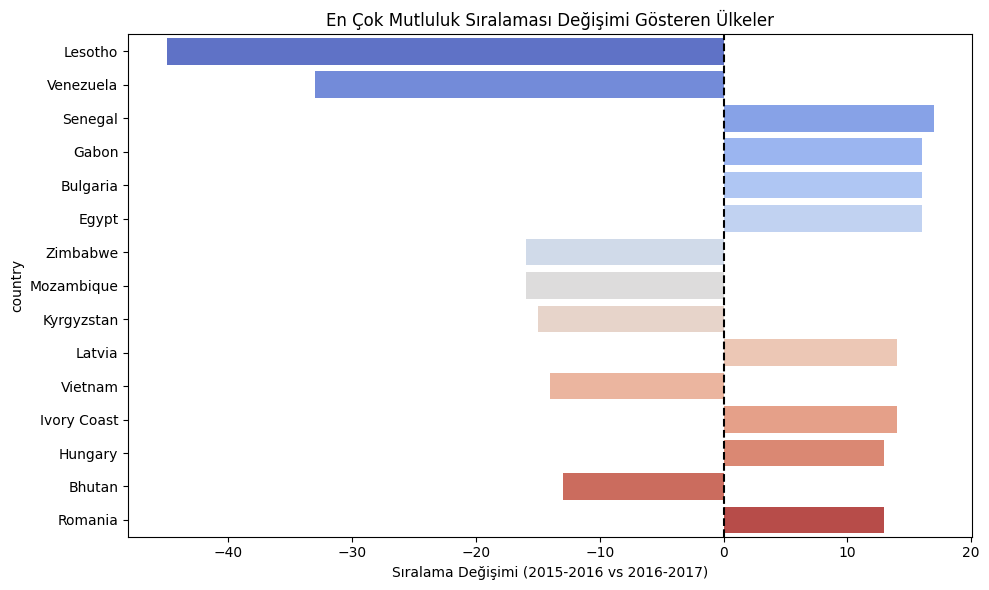

In [29]:
top_changes = rank_change.abs().sort_values(ascending=False).head(15).index
rank_change_top = rank_change.loc[top_changes]

plt.figure(figsize=(10,6))
sns.barplot(x=rank_change_top.values, y=rank_change_top.index, palette='coolwarm')
plt.xlabel("Sıralama Değişimi (2015-2016 vs 2016-2017)")
plt.title("En Çok Mutluluk Sıralaması Değişimi Gösteren Ülkeler")
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()


Herhangi bir ülke mutlulukta önemli bir artış veya azalma yaşadı mı?

In [27]:
pivot = data.pivot_table(index='country', columns='year', values='happiness_score')

# Örnek: 2015 ile 2019 arasındaki fark
pivot['change_15_19'] = pivot[2019] - pivot[2015]

# Artış ve azalışlar
significant_increase = pivot[pivot['change_15_19'] > 0.5]
significant_decrease = pivot[pivot['change_15_19'] < -0.5]

print("Önemli mutluluk artışı yaşayan ülkeler:")
print(significant_increase['change_15_19'])

print("\nÖnemli mutluluk azalışı yaşayan ülkeler:")
print(significant_decrease['change_15_19'])

Önemli mutluluk artışı yaşayan ülkeler:
Series([], Name: change_15_19, dtype: float64)

Önemli mutluluk azalışı yaşayan ülkeler:
country
Central African Republic   -0.985
Name: change_15_19, dtype: float64


Ülkeler mutlulukta önemli artış veya azalma yaşadı mı?

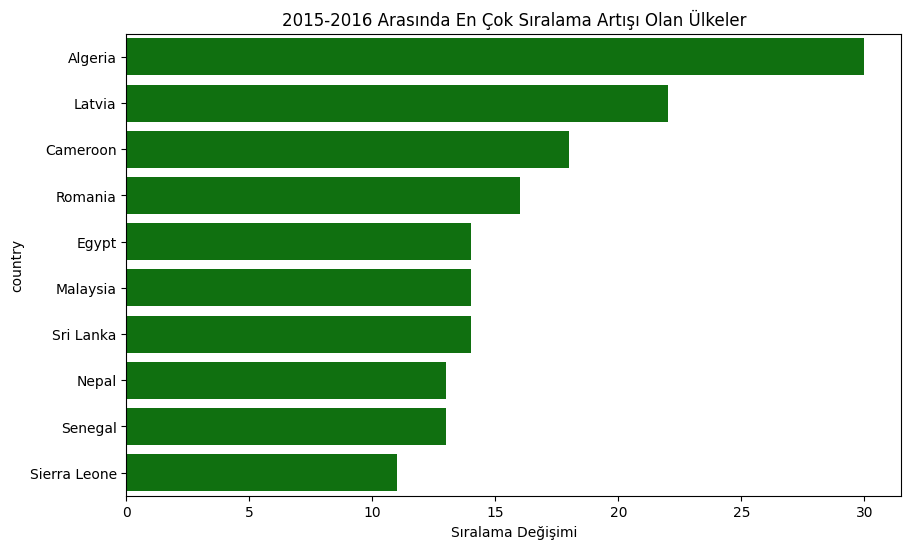

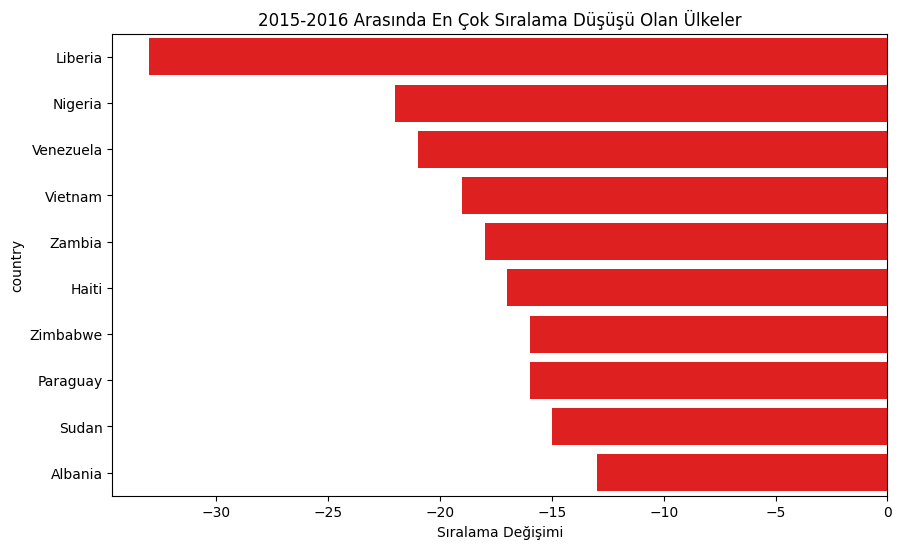

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

top_increase = rank_change_15_16.sort_values(ascending=False).head(10)
top_decrease = rank_change_15_16.sort_values().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_increase.values, y=top_increase.index, color='green')
plt.title("2015-2016 Arasında En Çok Sıralama Artışı Olan Ülkeler")
plt.xlabel("Sıralama Değişimi")
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x=top_decrease.values, y=top_decrease.index, color='red')
plt.title("2015-2016 Arasında En Çok Sıralama Düşüşü Olan Ülkeler")
plt.xlabel("Sıralama Değişimi")
plt.show()


Bu ülkelerin sıralamada yükselmesi, raporlardaki altı mutluluk faktöründen bir veya birkaçında gelişme olduğunu düşündürür.